#<h1 style="background-color:red;font-family:Georgia;font-size:350%;text-align:center">corona_prediction data</h1>



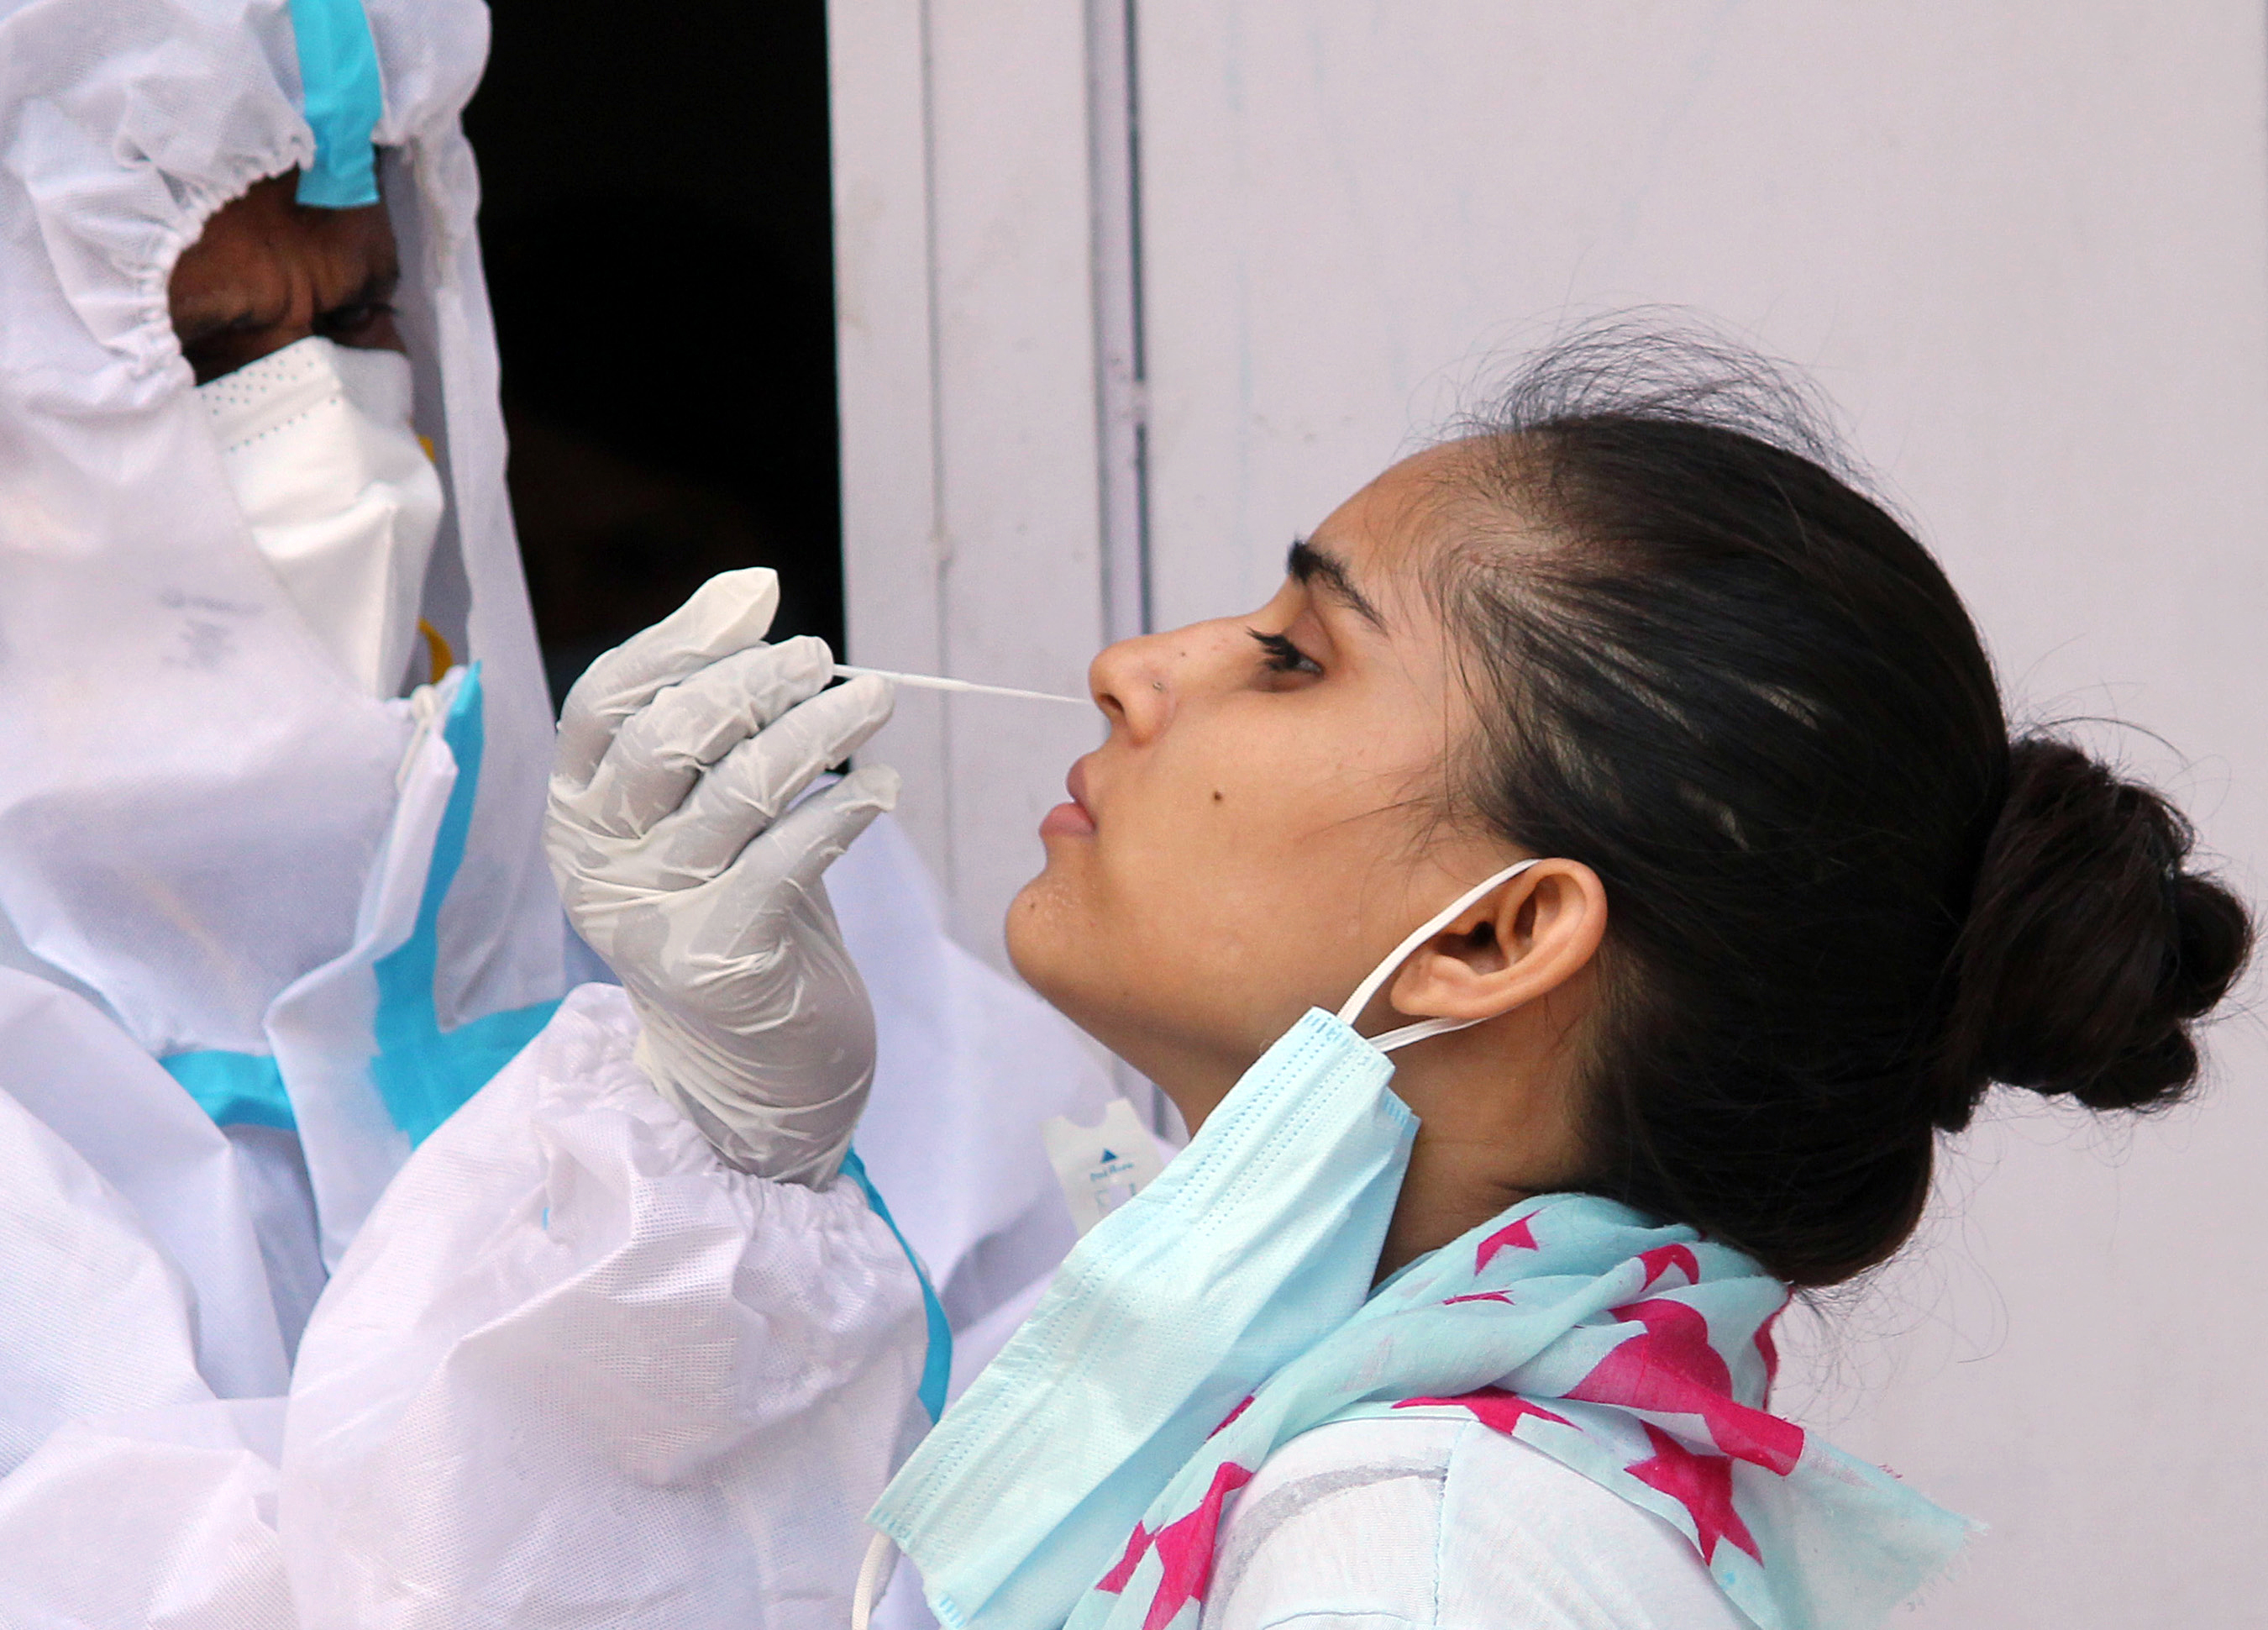

In [1]:
import pyforest

In [2]:
df = pd.read_csv('C:/Users/Acer/csv files/corona_data.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
0,60,100,1,1,1,0
1,75,102,1,0,0,1
2,25,98,0,0,0,1
3,34,97,0,0,0,0
4,4,96,0,1,0,1


In [4]:
df.shape

(7104, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7104 entries, 0 to 7103
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Age                    7104 non-null   int64
 1   Fever                  7104 non-null   int64
 2   BodyPains              7104 non-null   int64
 3   RunnyNose              7104 non-null   int64
 4   Difficulty_in_Breath   7104 non-null   int64
 5   infection_Probability  7104 non-null   int64
dtypes: int64(6)
memory usage: 333.1 KB


In [6]:
df.isna().sum()

Age                      0
Fever                    0
BodyPains                0
RunnyNose                0
Difficulty_in_Breath     0
infection_Probability    0
dtype: int64

In [7]:
df.to_csv('corona_data.csv',index=False)

In [8]:
df = pd.read_csv('corona_data.csv')
df.head(2)

<IPython.core.display.Javascript object>

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
0,60,100,1,1,1,0
1,75,102,1,0,0,1


In [9]:
df.Difficulty_in_Breath.value_counts()

0    3589
1    3515
Name: Difficulty_in_Breath, dtype: int64

In [10]:
df.BodyPains.value_counts()

0    3574
1    3530
Name: BodyPains, dtype: int64

In [11]:
df.Age.value_counts()

85    93
2     93
30    88
95    86
64    86
      ..
84    58
12    58
92    57
70    53
77    49
Name: Age, Length: 100, dtype: int64

In [12]:
df.Fever.value_counts()

105    588
98     586
108    567
97     557
107    556
96     544
99     541
106    538
100    536
103    533
101    529
102    519
104    510
Name: Fever, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

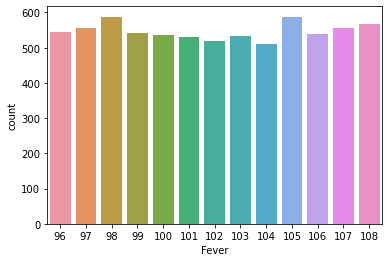

In [13]:
sns.countplot(df.Fever)
plt.show()

In [14]:
df.infection_Probability.value_counts()

0    3598
1    3506
Name: infection_Probability, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

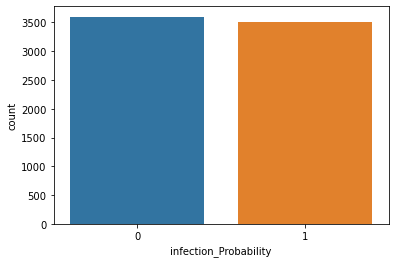

In [15]:
sns.countplot(df.infection_Probability)
plt.show()

# Condition -1

In [16]:
cond_1 =(df['Fever']>100) & (df['BodyPains']==1) & (df['RunnyNose']==1) & (df['Difficulty_in_Breath']==1)

In [17]:
df['infection_Probability'][cond_1] = 1

In [18]:
df[cond_1]

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
6,44,103,1,1,1,1
7,57,103,1,1,1,1
47,90,105,1,1,1,1
48,4,105,1,1,1,1
67,72,103,1,1,1,1
...,...,...,...,...,...,...
7019,58,104,1,1,1,1
7030,13,107,1,1,1,1
7070,38,102,1,1,1,1
7098,83,103,1,1,1,1


# condition-2:

In [19]:
cond_2 = (df['Age']>=60) & (df['Fever']>99) & (df['RunnyNose']==1) &  (df['Difficulty_in_Breath']==1) | (df['BodyPains']==1)

In [20]:
df['infection_Probability'][cond_2] = 1

In [21]:
df[cond_2]

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
0,60,100,1,1,1,1
1,75,102,1,0,0,1
6,44,103,1,1,1,1
7,57,103,1,1,1,1
8,88,99,1,1,1,1
...,...,...,...,...,...,...
7093,61,98,1,0,0,1
7096,76,98,1,1,0,1
7097,57,96,1,0,0,1
7098,83,103,1,1,1,1


In [22]:
df.infection_Probability.value_counts()

1    5423
0    1681
Name: infection_Probability, dtype: int64

# Condition - 3:

In [23]:
cond_3 =(df['Fever']>99) & (df['BodyPains']==0) & (df['RunnyNose']==0) & (df['Difficulty_in_Breath']==0)

In [24]:
df['infection_Probability'][cond_3] = 0

df[cond_3]

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
16,36,107,0,0,0,0
18,17,104,0,0,0,0
21,70,108,0,0,0,0
27,7,108,0,0,0,0
38,70,101,0,0,0,0
...,...,...,...,...,...,...
7082,97,107,0,0,0,0
7090,42,103,0,0,0,0
7095,59,101,0,0,0,0
7100,22,104,0,0,0,0


In [25]:
df.infection_Probability.value_counts()

1    5133
0    1971
Name: infection_Probability, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

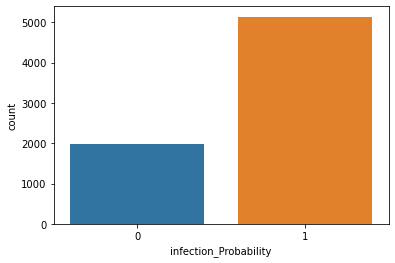

In [26]:
sns.countplot(df.infection_Probability)
plt.show()

In [27]:
df.shape

(7104, 6)

In [28]:
df.head(2)

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
0,60,100,1,1,1,1
1,75,102,1,0,0,1


In [29]:
X = df.drop('infection_Probability',axis=1).values
Y = df['infection_Probability'].values

In [30]:
X.shape

(7104, 5)

In [31]:
from sklearn.model_selection import StratifiedKFold,KFold,cross_val_score,ShuffleSplit,GridSearchCV

In [32]:
cv = StratifiedKFold(n_splits=5,random_state=11)

C:\Users\ANIL KUMAR\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [33]:
kf = KFold(n_splits=5,random_state=100)

In [34]:
for train_index, test_index in cv.split(X,Y):
    
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

In [35]:
X_train.shape

(5684, 5)

In [36]:
X_test.shape

(1420, 5)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score,confusion_matrix

In [38]:
lr = LogisticRegression(class_weight='balanced')

In [39]:
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [40]:
lr_pred = lr.predict(X_test)

In [41]:
lr_acc = accuracy_score(y_test,lr_pred)
lr_acc

0.8021126760563381

In [42]:
# Logistice Regression
cross_val_score(lr,X,Y,cv=cv)

array([0.77128783, 0.80788177, 0.80225194, 0.7635468 , 0.80211268])

In [43]:
lr_cm = confusion_matrix(y_test,lr_pred)
lr_cm

array([[380,  14],
       [267, 759]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

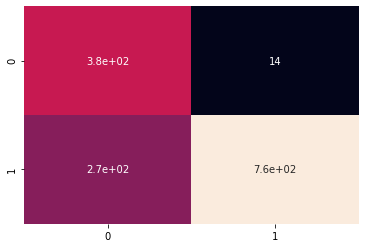

In [44]:
lr_df = pd.DataFrame(data=lr_cm,columns=['0','1'],index=['0','1'])
lr_df
sns.heatmap(lr_df,annot=True,cbar=False)
plt.show()

In [45]:

#Correct   - classification
int(3.8e+02) + int(7.6e+02)

1140

In [46]:
# Mis-classification
int(2.6e+02)+int(13)

273

In [47]:
1140 + 273

1413

In [48]:
y_test.shape

(1420,)

# Tree model

In [49]:
tr = DecisionTreeClassifier(class_weight='balanced')

In [50]:
tr.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [51]:
tr_pred = tr.predict(X_test)

In [52]:
tr_acc = accuracy_score(y_test,tr_pred)
tr_acc

0.828169014084507

In [53]:
# Tree 
cross_val_score(tr,X,Y,cv=cv)

array([0.80225194, 0.81210415, 0.80999296, 0.79169599, 0.83028169])

In [54]:
tr_cm = confusion_matrix(y_test,tr_pred)
tr_cm

array([[276, 118],
       [126, 900]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

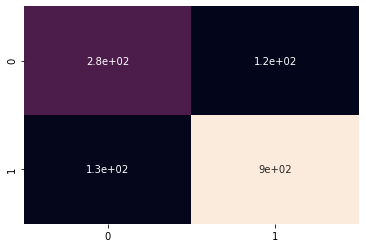

In [55]:
tr_df = pd.DataFrame(data=tr_cm,columns=['0','1'],index=['0','1'])
tr_df
sns.heatmap(tr_df,annot=True,cbar=False)
plt.show()

In [56]:
# Mis-classification
int(1.3e+02) + int(1.2e+02)

250

In [57]:
#Correct   - classification
int(9e+02)+int(2.8e+02)

1180

In [58]:
250+1180

1430

In [59]:
y_test.shape

(1420,)

# Tunig & Best Model

In [60]:
def find_best_model(X,Y):
    algos = {
        
        'logistic_reg':{
            'model':LogisticRegression(class_weight='balanced'),
        'params' :{
            'penalty':['l1','l2'],
            'C':[0.0001,0.001,0.01,0.1,1.0,10,100,1000]
        }
    },
        
    'DT_clf':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini', 'entropy'],
            'max_depth': [2,4,6,8,12]
        }
    }
    }
    
    
    scores =[]
    
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=567)
    
    for algo_name,config in algos.items():
        gd = GridSearchCV(config['model'],param_grid=config['params'],cv=cv,return_train_score=False)
        gd.fit(X,Y)
        
        scores.append({
            'model':algo_name,
            'best_score':gd.best_score_,
            'best_params':gd.best_params_
            
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [61]:
find_best_model(X_train,y_train)

C:\Users\ANIL KUMAR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ANIL KUMAR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ANIL KUMAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ANIL KUMAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\ANIL KUMAR\anaconda3\lib\site-packages\s

<IPython.core.display.Javascript object>

,model,best_score,best_params
0,logistic_reg,0.795075,"{'C': 100, 'penalty': 'l2'}"
1,DT_clf,0.807036,"{'criterion': 'gini', 'max_depth': 6}"


In [62]:
dt_clf  = DecisionTreeClassifier(criterion='gini',max_depth=6,class_weight='balanced')
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6)

In [63]:
y_pred = dt_clf.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred)

0.8253521126760563

In [65]:
tr_cm = confusion_matrix(y_test,y_pred)
tr_cm

array([[390,   4],
       [244, 782]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

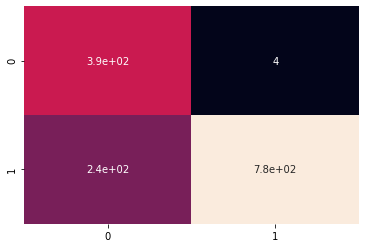

In [66]:
tr_df = pd.DataFrame(data=tr_cm,columns=['0','1'],index=['0','1'])
tr_df
sns.heatmap(tr_df,annot=True,cbar=False)
plt.show()

In [67]:
df.head(2)

,Age,Fever,BodyPains,RunnyNose,Difficulty_in_Breath,infection_Probability
0,60,100,1,1,1,1
1,75,102,1,0,0,1


# Positive Check

In [68]:
dt_clf.predict([[60,100,1,1,1]])[0]

1

# Negative Check

In [69]:
dt_clf.predict([[60,100,0,0,0]])[0]

0

In [70]:
from sklearn.metrics import f1_score,precision_score,recall_score

In [71]:
f1_score(y_test,y_pred)

0.8631346578366447

In [72]:
precision_score(y_test,y_pred)

0.9949109414758269

In [73]:
recall_score(y_test,y_pred)

0.7621832358674464

#### Note:

Here we improve the Precission and recall.
so it is useful to avoid false -ves

# Export Model

In [74]:
import pickle

In [75]:
with open('corona.pkl','wb') as f:
    pickle.dump(dt_clf,f)

In [76]:
pickle_in = open("corona.pkl","rb")
model = pickle.load(pickle_in)

In [77]:
model.predict([[60,100,0,0,0]])[0]

0

In [78]:
model.predict_proba([[60,100,0,1,0]])[0][0]

0.688446272382766